# Splitting the Dataset

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
                                                    iris['target'], random_state=0)

In [31]:
X_train.shape

(112, 4)

In [32]:
X_test.shape

(38, 4)

# Building first model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Making Predictions

In [35]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [36]:
prediction = knn.predict(X_new)
print(prediction)

[0]


In [37]:
print(iris['target_names'][prediction])

['setosa']


# Evaluating Model

In [38]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

np.float64(0.9736842105263158)

In [39]:
knn.score(X_test, y_test)

0.9736842105263158

# Loading data from file

In [40]:
X = np.genfromtxt('iris_data.txt')
X[:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

# Exercises

1. np.mean keeps track of every instance where y_pred == y_test is true and counts them. Then, it divides the number of times y_pred == y_test by the total amount of entries that exist within y_pred (or y_test)

2. This code should show the % of error for each different K that is used in the KNN classifier. The domain of the X-axis ranges from 1 all the way to the # of training samples that there are.

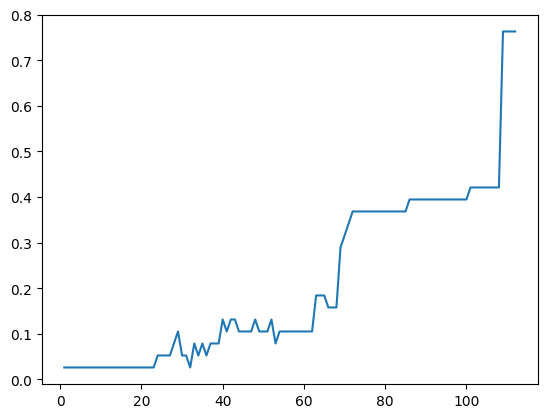

In [42]:
import matplotlib.pyplot as plt
k_results = np.arange(1, X_train.shape[0]+1)
error_rates = np.zeros(X_train.shape[0])

for k in k_results:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = np.mean(y_pred != y_test)
    error_rates[k-1] = error_rate
plt.plot(k_results, error_rates)

3. After checking dimensions, shape, and data entries. We find that althougth X and iris share the same dimensionality, they differ in a few row entries. For row 34, X and iris differ in petal width. For row 37, X and iris differ in both sepal width and petal length.

In [47]:
X.shape == iris['data'].shape

True

In [48]:
np.array_equal(iris['data'], X)

False

In [50]:
np.where(iris['data'] != X)

(array([34, 37, 37]), array([3, 1, 2]))

In [53]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']